# ESTATÍSTICA - EXERCÍCIOS A ENTREGAR **WomakersCode**

Nome: Ana Luisa Fuchs da Silveira

In [2]:
### bibliotecas base
import pandas as pd
import numpy as np
### bibliotecas para visualizacao de dados
import seaborn as sns
import matplotlib.pyplot as plt
### bibliotecas para estatística
import scipy.stats as stat

Você é uma pesquisadora de um cursinho para estudantes que querem ingressar na universidade em 2025. Seu objetivo é retirar informações da base de dados do enem do ano anterior para alinhar melhor as estratégias do cursinho para cada estudante. O dado possui 6 colunas, 5 delas representam as disciplinas do ENEM e uma o gênero das pessoas que fizeram a prova. No dado existe a representação de 1000 pessoas, sendo cada uma delas uma linha.


In [77]:
df = pd.read_json('enem_2023.json')  #Leitura do material

In [79]:
df_copy = df.copy() #Os valores serão alterados e ajustados no DF, mantendo esta apenas para ter um 'registro original'

In [80]:
### leitura do dataset frobes que contém os dados
df.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


In [81]:
df.info() ### verificando quais colunas sao numéricas e quais categóricas.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Linguagens            897 non-null    float64
 1   Ciências humanas      936 non-null    float64
 2   Ciências da natureza  824 non-null    float64
 3   Matemática            924 non-null    float64
 4   Redação               860 non-null    float64
 5   Sexo                  1000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 54.7+ KB


>  ## 1. Qual das disciplinas tem a maior amplitude de nota?

In [87]:
df.describe()  #Uma maneira rápida e fácil de verificar média, quantidade, máxima, mínima, etc.

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,514.578415,526.880850,499.520391,535.759100,637.432194
std,79.560876,75.280340,71.488051,83.290104,106.956723
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,464.362445,479.418513,459.456673,485.234093,571.697962
50%,515.045250,524.519920,500.479263,533.247767,635.273973
75%,564.793722,576.696971,536.724816,586.927627,699.972897
max,804.456317,763.919695,802.004568,807.877902,1000.000000


In [83]:
def describe_new(df):
    df1 = df.describe()
    df1.loc["amplitude"] = df1.loc['max'] - df1.loc['min']
    df1.loc["variancia"] = df1.loc['std']*df1.loc['std']
    return df1

    #Função aprendida em aula para adicionar amplitude e variância no describe()

In [84]:
df = df.fillna(df.median(numeric_only=True))
#Maneira de remover todos os valores nulos pela média (numeric_only permite ser considerado apenas números para a média)

In [88]:
df.isna().any()  #Verificando se os valores foram realmente removidos:

Linguagens              False
Ciências humanas        False
Ciências da natureza    False
Matemática              False
Redação                 False
Sexo                    False
dtype: bool

In [90]:
df_info = describe_new(df)
#O dataframe com as novas informações ficou salvo no df_info

In [91]:
df_info = df_info.transpose()
#Para melhor manipulação, inverte-se linhas por colunas (mais fácil trabalhar com colunas que indexes)

In [92]:
df_info.loc[df_info['amplitude'] == df_info['amplitude'].max()]
 #Assim, filtra-se a disciplina com maior amplitude

,count,mean,std,min,25%,50%,75%,max,amplitude,variancia
Redação,1000.0,637.432194,106.956723,270.839965,571.697962,635.273973,699.972897,1000.0,729.160035,11439.740646


> A maior amplitude de nota se dá na REDAÇÃO

## 2. Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se de remover todos os valores nulos quando considerar a mediana)


In [ ]:
df = df.fillna(df.median(numeric_only=True))
#Apenas para mostrar, os valores nulos já foram tratados com esse comando na questão anterior

In [7]:
df.isna().any()  #Novamente, apenas para exemplificação da não existência de valores nulos.

Linguagens              False
Ciências humanas        False
Ciências da natureza    False
Matemática              False
Redação                 False
Sexo                    False
dtype: bool

> Média:

In [93]:
df_info['mean']
#Média de todas as disciplinas, e, já que os valores nulos já foram tratados no dataframe anteriormente, busca-se apenas a coluna necessária

Linguagens              514.578415
Ciências humanas        526.880850
Ciências da natureza    499.520391
Matemática              535.759100
Redação                 637.432194
Name: mean, dtype: float64

> Mediana

In [94]:
df.median()
#Visto que os valores já foram ajeitados, é possível só utilizar a função diretamente.

<ipython-input-94-cbfdf8eac936>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()  #Visto que os valores já foram ajeitados, é possível só utilizar a função


Linguagens              515.045250
Ciências humanas        524.519920
Ciências da natureza    500.479263
Matemática              533.247767
Redação                 635.273973
dtype: float64

## 3. Considerando o curso de Ciência da Computação da UFPE, onde o peso cada uma das disciplinas ponderado
a. Redação - 2

b. Matemática e suas Tecnologias - 4

c. Linguagens, Códigos e suas Tecnologias - 2

d. Ciências Humanas e suas Tecnologias - 1

e. Ciências da Natureza e suas Tecnologias - 1

Qual o desvio padrão e média das notas dos 500 estudantes mais bem
colocados considerando esses pesos?


In [95]:
pesos_area = { 'Redação' : 2, 'Matemática' : 4, 'Linguagens' : 2, 'Ciências humanas' : 1, 'Ciências da natureza' : 1 }
#Cria-se um dicionário com os pesos de cada disciplina

In [96]:
def calcular_nota_ponderada(notas, pesos_area):
  return sum(notas[area] * pesos_area[area] for area in notas.columns)

#Cria-se a função para adicionar os pesos em cada nota, multiplicando o peso por sua respectiva área e somando o total das notas

In [98]:
df_somente_notas = df.drop(columns=['Sexo'])
#Para a função ser utilizada, removi a coluna Sexo, visto que é string e necessitamos de apenas números

In [99]:
df_somente_notas['Ciencia da Computacao'] = calcular_nota_ponderada(df_somente_notas, pesos_area)
#Uma nova coluna no df recebe a função

In [100]:
df_somente_notas.head()
#Aqui, é possível verificar a existência da nova coluna.

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Ciencia da Computacao
0,585.669300,686.512178,390.482473,452.281333,546.371706,5150.201992
1,359.384608,642.084134,500.479263,412.205207,741.825256,4993.803951
2,622.732384,495.510719,443.183580,669.683401,684.515750,6231.924171
3,350.164605,602.041588,413.979810,676.608952,671.237114,5765.260643
4,384.093657,489.249140,609.758123,520.426698,744.375048,5437.651463


In [101]:
df_cc = df_somente_notas.nlargest(500, 'Ciencia da Computacao')
#Seleciona-se as 500 mais

In [102]:
df_cc.head(10)

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Ciencia da Computacao
25,604.825455,447.532353,523.041011,727.181224,870.464077,6829.877324
824,533.812379,611.760520,494.994598,807.877902,697.570213,6801.031909
702,551.398112,637.818208,451.624683,803.769938,652.669636,6712.658138
129,583.015454,434.261543,588.516699,687.621711,852.273821,6643.843636
60,498.394660,668.355060,457.371963,760.136151,711.458481,6585.977907
880,671.524266,590.780179,546.595272,571.607337,909.379934,6585.613200
376,364.096042,582.024626,523.764760,749.912621,872.188740,6578.009433
989,462.051713,512.986241,506.405210,787.771672,692.814673,6480.210912
769,585.434004,339.101146,500.479263,717.426502,797.884736,6475.923897
694,497.493880,609.839007,528.413513,737.175029,693.739043,6469.418478


In [104]:
df_cc['Ciencia da Computacao'].describe()
#Com a função describe, permite-se verificar a média (mean) e desvio padrão (std) das notas de Ciencia da Computacao

count     500.000000
mean     5820.063409
std       263.860196
min      5460.947691
25%      5608.286554
50%      5766.325228
75%      5996.725188
max      6829.877324
Name: Ciencia da Computacao, dtype: float64

> Portanto, a média de notas dos 500 mais bem colocados alunos que foram para Ciência da Computação seria de 582 e o desvio padrão de 263

## 4. Se todos esses estudantes aplicassem para ciência da computação e existem apenas 40 vagas, qual seria a variância e média da nota dos estudantes que entraram no curso de ciência da computação?


In [106]:
df_aprovados_cc = df_cc.nlargest(40, 'Ciencia da Computacao')
#Seleciona-se os 40 melhores em nota pela função nlargest e salva-se na variável

In [109]:
df_aprovados_cc['Ciencia da Computacao'].mean()  #média dos 40 aprovados

6396.0846587935375

In [110]:
df_aprovados_cc['Ciencia da Computacao'].std() * df_aprovados_cc['Ciencia da Computacao'].std()
#variância, que é desvio padrão ao quadrado

24737.642238482647

## 5. Qual o valor do teto do terceiro quartil para as disciplinas de matemática e linguagens?


In [111]:
df['Linguagens'].quantile([0.25, 0.5, 0.75])  #Todos os quartis em Linguagens

0.25    464.362445
0.50    515.045250
0.75    564.793722
Name: Linguagens, dtype: float64

In [112]:
df['Linguagens'].loc[df['Linguagens'] > df['Linguagens'].quantile(0.75)].max()
#No filtro, dentre os valores em linguagens, qual possui o máximo/teto acima do terceiro quartil

804.4563171927

In [113]:
df['Matemática'].quantile([0.25, 0.5, 0.75])
 #Todos os quartis em matemática

0.25    485.234093
0.50    533.247767
0.75    586.927627
Name: Matemática, dtype: float64

In [114]:
df['Matemática'].loc[df['Matemática'] > df['Matemática'].quantile(0.75)].max()
# #No filtro, dentre os valores em linguagens, qual possui o máximo/teto acima do terceiro quartil

807.8779018921

## 6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos. Podemos dizer que são histogramas simétricos, justifique e classifique se não assimétricas?


<Axes: ylabel='Frequency'>

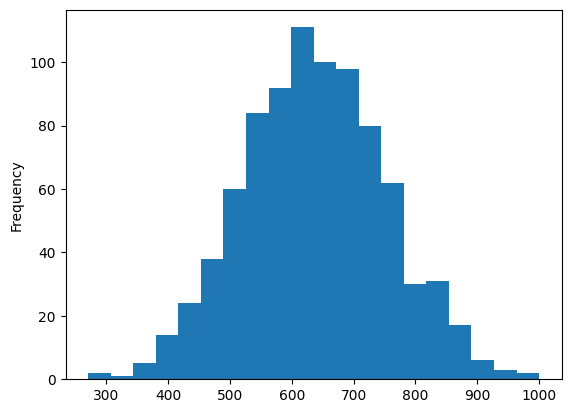

In [115]:
df_copy['Redação'].plot.hist(bins=20)
#Utilizou-se a versão copy, sem a alteração, pois os valores nulos foram substituídos pela média, portando interferiria no valor.

<Axes: ylabel='Frequency'>

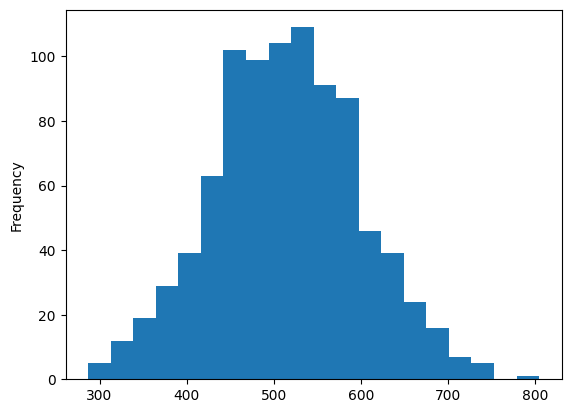

In [ ]:
df_copy['Linguagens'].plot.hist(bins=20)
#bins é a separação de 20 em 20 das notas

Percebe-se que as notas de Redação e Linguagens podem ser classificadas como simétricas, visto que a maior população de notas concentra-se entre 400 e 600 nas linguagens, e entre 500 e 750 nas redações.

## 7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma opinião quanto a simetria? `[plt.hist(dado, bins=_, range=[0, 1000])`

<Axes: ylabel='Frequency'>

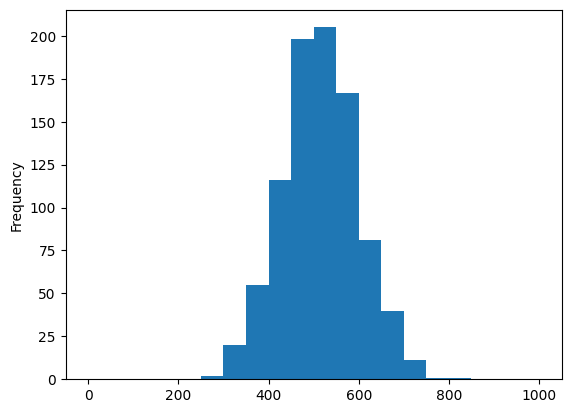

In [116]:
df_copy['Linguagens'].plot.hist(bins=20, range=[0, 1000])  #Não consegui informação do que seria o "dado"

<Axes: ylabel='Frequency'>

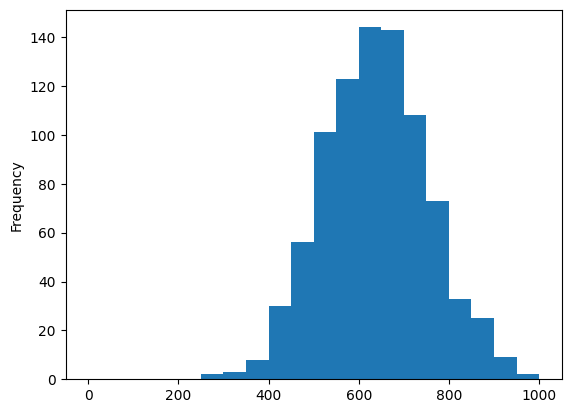

In [117]:
df_copy['Redação'].plot.hist(bins=20, range=[0, 1000])

Sim, houve um ligeiro deslocamento para a direita, mas todas as notas possuem esse deslocamento, permanecendo uma concentração maior no meio e uma simetria nos extremos.

## 8. Faça um boxplot do quartil de todas as disciplinas de ciências da natureza e redação. É possível enxergar outliers? Utilize o método IQR.


<Axes: >

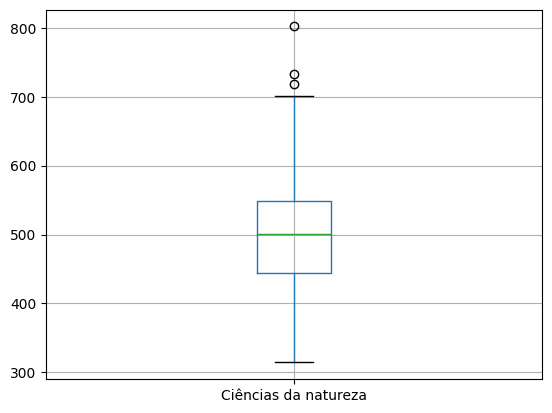

In [ ]:
df_copy.boxplot(column='Ciências da natureza')
#Boxplot simples da coluna 'Ciência da natureza'

Apenas com o método boxplot  é possível verificar a presença de outliers. Porém, na questão, solicitou-se utilização do método IQR, portanto devemos determiná-los utilizando as funções aprendidas em aula:

In [ ]:
def find_outlier_iqr(dataset, colname):
    q25, q75 = np.quantile(dataset[colname], 0.25), np.quantile(dataset[colname], 0.75)
    # calcula  IQR
    iqr = q75 - q25
    # calcula outlier cutoff
    cut_off = iqr * 1.5
    # calcula margens inferiores, lower e superiores upper
    lower, upper = q25 - cut_off, q75 + cut_off
    print(' IQR é ',iqr)
   # print('Valor minimo', lower)
   # print('Valor maximo', upper)
    outliers = []

    for i in dataset[colname].values:
      if((i > upper) or(i < lower)):
        outliers.append(i)
    print('O numero de outliers encontrado foi de', len(outliers))
    return lower, upper, outliers

Função dada em aula para cálculo dos outliers pelo método IQR

In [ ]:
find_outlier_iqr(df, 'Ciências da natureza')  #utiliza-se o dataframe "df" que não possui NaN, tratado anteriormente
#Retornou-se todos os valores IQRs

 IQR é  77.26814280032505
O numero de outliers encontrado foi de 41


(343.55445852648745,
 652.6270297277877,
 [655.7246556737,
  653.9772404618,
  321.1673349657,
  673.57290931,
  314.4,
  683.2283474272,
  685.6974296116,
  334.8016486251,
  660.6470320634,
  664.0654344447,
  802.0045683513,
  676.9314870378,
  336.9358873703,
  683.7672480292,
  661.3019395727,
  684.5514241699,
  668.7422609399,
  654.7596178918,
  669.0529579316,
  732.5029639878,
  718.3960614586,
  332.0809884864,
  336.2184615969,
  336.6172324003,
  317.5751521525,
  679.8590914345,
  672.9466457085,
  692.8388576928,
  678.5691470194,
  339.5699212101,
  672.9023391593,
  670.8207808001,
  335.0697098861,
  680.963748707,
  315.3845881253,
  314.4,
  318.7797061948,
  314.4,
  314.4,
  701.8130524987,
  676.0303399624])

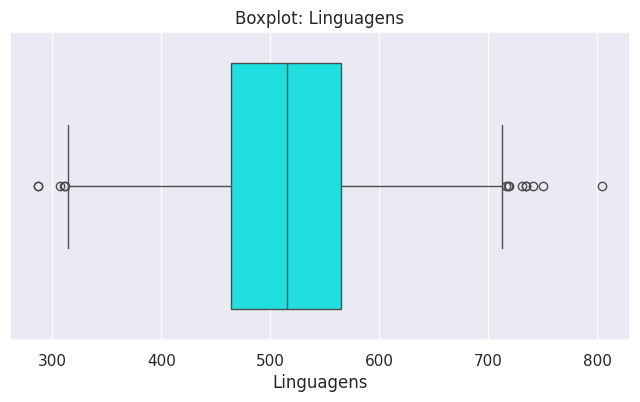

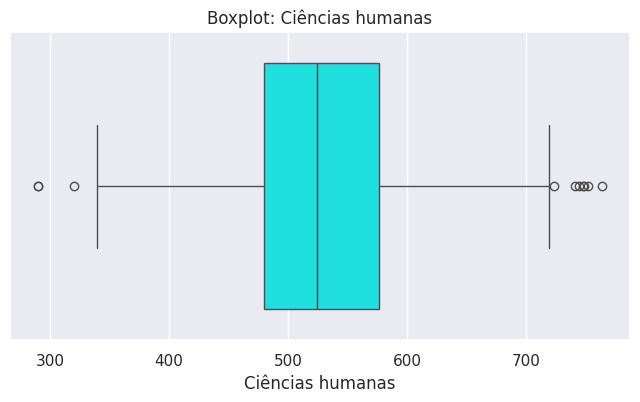

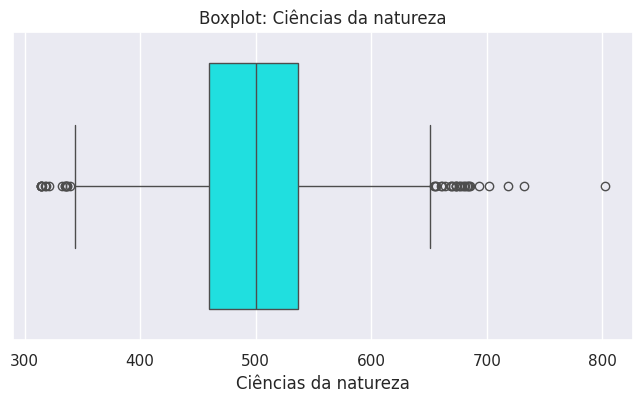

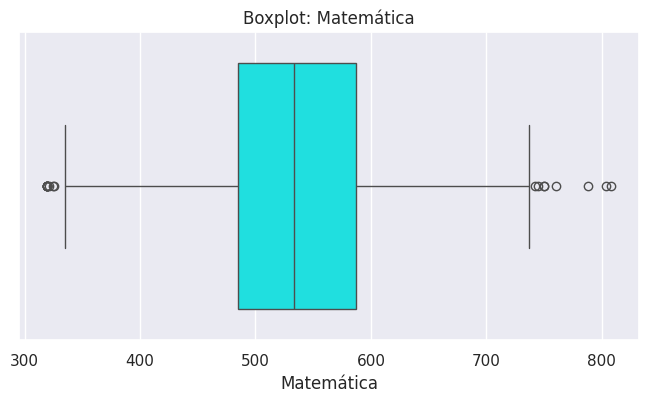

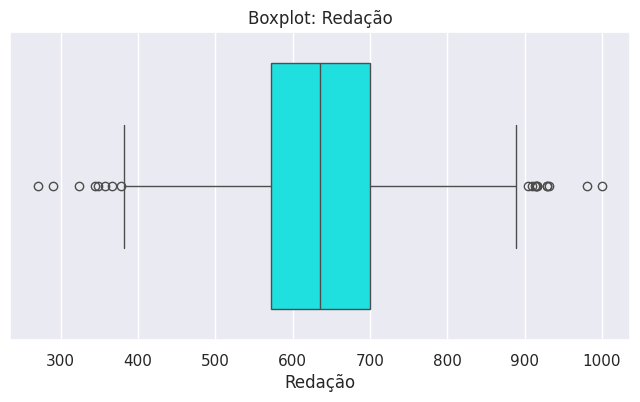

In [ ]:
#Boxplot feito em aula com  apresença dos outliers
plt.rcParams['figure.figsize'] = [8, 4]
sns.set_theme()
### para cada uma das colunas numericas roda o boxplot
for column in df.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.boxplot(data = df , x = column, color='cyan',showfliers=True)
    plt.title("Boxplot: "+column)

## 9. Remova todos os outliers e verifique se eles são passíveis de alterar a média nacional significativamente? (considere significativamente um valor acima de 5%)


In [ ]:
df.mean()

<ipython-input-131-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


Linguagens              514.578415
Ciências humanas        526.880850
Ciências da natureza    499.520391
Matemática              535.759100
Redação                 637.432194
dtype: float64

In [ ]:
df.isna().any()  #Não existem NAN no dataframe original

Linguagens              False
Ciências humanas        False
Ciências da natureza    False
Matemática              False
Redação                 False
Sexo                    False
dtype: bool

In [ ]:
df_teste = df.copy()   #Para utilizar nesse exercício, criei uma cópia para poder comparar com a média original depois
df_teste = df_teste.drop(columns='Sexo') #Remoção da coluna não numérica

In [ ]:
def replace_na_outliers(dataset, colname):  #Função adaptada da aula que substitui os valores outliers por NAN em cada coluna
    q25, q75 = np.quantile(dataset[colname], 0.25), np.quantile(dataset[colname], 0.75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    outliers = []
    val = []
    for i in dataset[colname].values:
      if((i > upper) or(i < lower)):
        outliers.append(i)
        val.append(np.nan)
      else:
          val.append(i)

    return val

In [ ]:
df_teste['Linguagens'] = replace_na_outliers(df_teste, 'Linguagens')  #Substituição dos outliers por NAN na coluna Linguagens

In [ ]:
df_teste['Linguagens'].isna().sum() #Verificação se a presença de NaN e quantos existem

14

In [ ]:
df_teste['Ciências humanas'] = replace_na_outliers(df_teste, 'Ciências humanas') #Repete-se o processo para cada coluna

In [ ]:
df_teste['Ciências humanas'].isna().sum()

10

In [ ]:
df_teste['Ciências da natureza'] = replace_na_outliers(df_teste, 'Ciências da natureza')

In [ ]:
df_teste['Ciências da natureza'].isna().sum()

41

In [ ]:
df_teste['Matemática'] = replace_na_outliers(df_teste, 'Matemática')

In [ ]:
df_teste['Matemática'].isna().sum()

18

In [ ]:
df_teste['Redação'] = replace_na_outliers(df_teste, 'Redação')

In [ ]:
df_teste['Redação'].isna().sum()

19

In [ ]:
df_teste.dropna().mean()   #Remove-se os NAN (outliers) e calcula-se a média

Linguagens              513.642986
Ciências humanas        524.577707
Ciências da natureza    496.157845
Matemática              536.811376
Redação                 635.023396
dtype: float64

In [ ]:
df_teste.dropna().mean() * 100 / df.mean()  #Verificação da % de quanto o outlier interferiu

<ipython-input-227-561337247907>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_teste.dropna().mean() * 100 / df.mean()


Linguagens               99.818215
Ciências humanas         99.562872
Ciências da natureza     99.326845
Matemática              100.196408
Redação                  99.622109
dtype: float64

Percebe-se que a presença dos outliers reduziu a média em quase todos, exceto matemática, porém não foi significativa (abaixo de 5%)

## 10. Considerando valores nulos, tente encontrar qual seria a melhor medida de tendência que pode substituir as notas nulas. Média, moda ou mediana? Substitua o valor por todos os três e diga qual delas altera menos a média geral e o desvio padrão.

In [118]:
df_copy.isna().any()   #Dataframe original, verificando a presença de outliers tratados (nan)

Linguagens               True
Ciências humanas         True
Ciências da natureza     True
Matemática               True
Redação                  True
Sexo                    False
dtype: bool

In [8]:
df_10 = df_copy.copy()  #cria-se a cópia para manipulação dos dados a fim de comparação

In [65]:
replace_mean  = df_10.fillna(df_10.mean(numeric_only=True)).describe().transpose()
#criação de um df contendo a média e desvio padrão utilizando a média no lugar dos outliers

In [66]:
replace_median = df_10.fillna(df_10.median(numeric_only=True)).describe().transpose()
#criação de um df contendo a média e desvio padrão utilizando a mediana no lugar dos outliers

In [67]:
replace_mode = df_10.fillna(df_10.mode(numeric_only=True)).describe().transpose()
#criação de um df contendo a média e desvio padrão utilizando a moda no lugar dos outliers

In [68]:
#junção das planilhas
joined_notes = replace_mean[['mean', 'std']].join(replace_median[['mean', 'std']], lsuffix='_mean', rsuffix='_median').join(replace_mode[['mean', 'std']], lsuffix='_median', rsuffix='_mode')

In [69]:
joined_notes.rename(columns={'mean' : 'mean_mode', 'std' : 'std_mode'}, inplace=True)
#renomeação para melhor visualização

In [70]:
joined_notes = df_info[['mean', 'std']].join(joined_notes)
#Adição da média e std original, sem a remoção dos outliers, apenas para fim comparativo

In [71]:
joined_notes

,mean,std,mean_mean,std_mean,mean_median,std_median,mean_mode,std_mode
Linguagens,514.578415,79.560876,514.524809,79.560718,514.578415,79.560876,514.524809,84.009313
Ciências humanas,526.880850,75.280340,527.042281,75.277806,526.880850,75.280340,527.042281,77.811519
Ciências da natureza,499.520391,71.488051,499.315583,71.486677,499.520391,71.488051,499.315583,78.760404
Matemática,535.759100,83.290104,535.965660,83.286987,535.759100,83.290104,535.965660,86.648100
Redação,637.432194,106.956723,637.783532,106.953175,637.432194,106.956723,637.815381,114.038611


Ao criar um dataframe contendo as médias e desvio padrão de cada disciplina considerando os valores sendo substituídos pela média (mean), mediana (median) e moda (mode), para facilitar comparação.

In [72]:
joined_notes.iloc[:, 0::2]
#Para fim de comparação, a tabela apenas com as médias originais, com  a remoção e alteração dos outliers pela média, moda e mediana

,mean,mean_mean,mean_median,mean_mode
Linguagens,514.578415,514.524809,514.578415,514.524809
Ciências humanas,526.880850,527.042281,526.880850,527.042281
Ciências da natureza,499.520391,499.315583,499.520391,499.315583
Matemática,535.759100,535.965660,535.759100,535.965660
Redação,637.432194,637.783532,637.432194,637.815381


Percebe-se,  em relação a média, que as três alterações não resultaram em mudança significativa (menos de 5%)

In [73]:
joined_notes.iloc[:, 1::2]
#Para fim de comparação, a tabela apenas com os desvios padrões originais, com a remoção e alteração dos outliers pela média, moda e mediana

,std,std_mean,std_median,std_mode
Linguagens,79.560876,79.560718,79.560876,84.009313
Ciências humanas,75.280340,75.277806,75.280340,77.811519
Ciências da natureza,71.488051,71.486677,71.488051,78.760404
Matemática,83.290104,83.286987,83.290104,86.648100
Redação,106.956723,106.953175,106.956723,114.038611


Percebe-se que, avaliando as tabelas, que a moda elevou o desvio padrão, enquanto a mediana e a média não interferiram tanto.